# PYSD intro

In [12]:
import sqlite3
import numpy as np
import pysd

model = pysd.read_vensim('Teacup.mdl')
tseries = range(30)

values = model.run()
values

,TIME,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
0.000,0.000,10,11.000000,70,180.000000,30,0,0.125,0.125
0.125,0.125,10,10.862500,70,178.625000,30,0,0.125,0.125
0.250,0.250,10,10.726719,70,177.267188,30,0,0.125,0.125
0.375,0.375,10,10.592635,70,175.926348,30,0,0.125,0.125
0.500,0.500,10,10.460227,70,174.602268,30,0,0.125,0.125
...,...,...,...,...,...,...,...,...,...
29.500,29.500,10,0.565131,70,75.651312,30,0,0.125,0.125
29.625,29.625,10,0.558067,70,75.580671,30,0,0.125,0.125
29.750,29.750,10,0.551091,70,75.510912,30,0,0.125,0.125
29.875,29.875,10,0.544203,70,75.442026,30,0,0.125,0.125


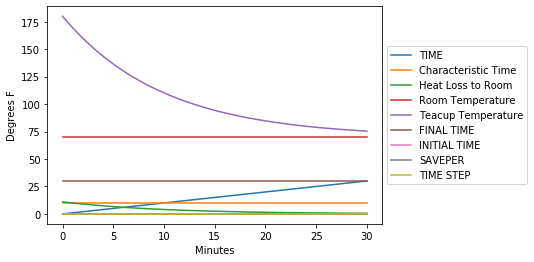

In [5]:
from matplotlib import pyplot as plt

values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

,Teacup Temperature,Room Temperature
0.000,180.000000,70
0.125,178.625000,70
0.250,177.267188,70
0.375,175.926348,70
0.500,174.602268,70


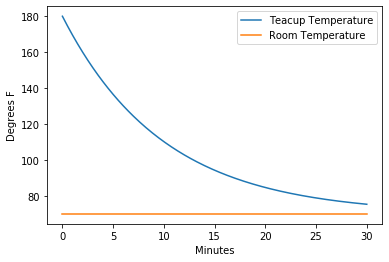

In [6]:
values = model.run(return_columns=['Teacup Temperature', 'Room Temperature'])
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes')
values.head()

,Teacup Temperature
0.0,180.000000
1.0,169.469405
3.0,151.336071
7.0,124.383922
9.5,112.287559


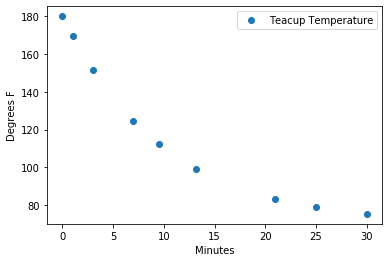

In [7]:
stocks = model.run(return_timestamps=[0,1,3,7,9.5, 13.178, 21, 25, 30],
                   return_columns=['Teacup Temperature'])
stocks.plot(linewidth=0, marker='o')
plt.ylabel('Degrees F')
plt.xlabel('Minutes')
stocks.head()

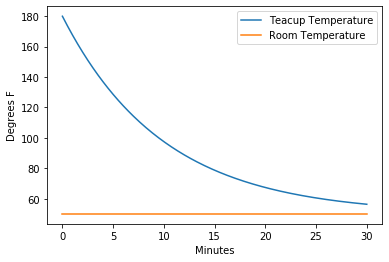

In [8]:
values = model.run(params={'Room Temperature':50},
                   return_columns=['Teacup Temperature', 'Room Temperature'])
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes');

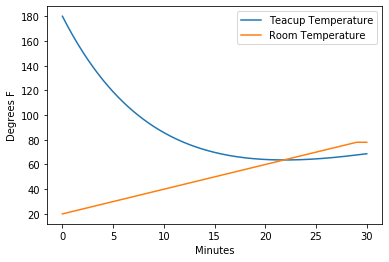

In [9]:
import pandas as pd
temp_timeseries = pd.Series(index=range(30), data=range(20,80,2))
values = model.run(params={'Room Temperature':temp_timeseries},
                   return_columns=['Teacup Temperature', 'Room Temperature'])
values.plot()
plt.ylabel('Degrees F')
plt.xlabel('Minutes');

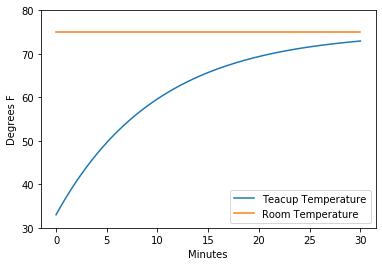

In [10]:
stocks = model.run(params={'room_temperature':75},
                   initial_condition=(0, {'teacup_temperature':33}),
                   return_columns=['Teacup Temperature', 'Room Temperature'])
stocks.plot()
plt.ylabel('Degrees F')
plt.ylim(30,80)
plt.xlabel('Minutes');

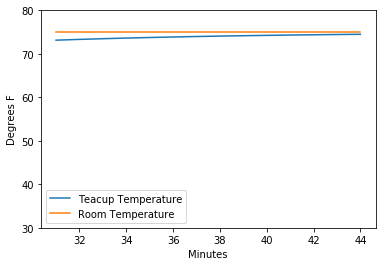

In [11]:
values = model.run(initial_condition='current',
                   return_columns=['Teacup Temperature', 'Room Temperature'],
                   return_timestamps=list(range(31,45)))
values.plot()
plt.ylabel('Degrees F')
plt.ylim(30,80)
plt.xlabel('Minutes');

# Data Import from Vensim

In [12]:
conn = sqlite3.connect('example.db')
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE sims
             (room_temperature real, init_teacup_temperature real,
              %s ) '''%', '.join(['t%i real'%i for i in tseries]));

room_temps = np.random.normal(75, 5, 100)
init_tea_temps = np.random.normal(175, 15, 100)

for room_temp, init_tea_temp in zip(room_temps, init_tea_temps):
    output = model.run(params={'room_temperature':room_temp},
                       initial_condition=(0,{'teacup_temperature':init_tea_temp}),
                       return_timestamps=tseries)

    c.execute("INSERT INTO sims VALUES (%i,%i,%s)"%
              (room_temp, init_tea_temp, ', '.join(output['teacup_temperature'].apply(str))))

    conn.commit()
    
c.execute('SELECT * FROM sims')
c.fetchall()
conn.close()

KeyError: 'teacup_temperature'